In [258]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from community import community_louvain
import community
from statistics import mean
import time

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix

from polyglot.text import Text

import twint
import nest_asyncio
nest_asyncio.apply()

### Create network dataframe based on users and mentions in tweets

In [2]:
file = 'data/zakazaborcji.csv'

#df = pd.read_csv(file, sep='\t', usecols=attributes_tweets, index_col='id')
data_df = pd.read_csv(file, sep='\t', index_col='id')

data_df.columns

Index(['conversation_id', 'created_at', 'date', 'time', 'timezone', 'user_id',
       'username', 'name', 'place', 'tweet', 'language', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'thumbnail',
       'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id',
       'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [3]:
network_df = pd.DataFrame(columns=['username', 'mention'])

for _, row in data_df.iterrows():
    mentions = list(row['mentions'].split(','))
    for mention in mentions:
        mention = mention.replace('[','').replace(']','')\
                         .replace('{','').replace('}','')\
                         .replace(' ','').replace('\'','')
        if mention != '' and mention.startswith('screen_name:'):
            mention = mention.replace('screen_name:','')
            #print(mention)
            network_df = network_df.append({'username': row['username'], 
                                            'mention': mention}, ignore_index=True)

network_df

,username,mention
0,mihashi_chan,akcjademokracja
1,leodille,akcjademokracja
2,grzegorzkrajski,pisorgpl
3,grzegorzkrajski,episkopatnews
4,nazwa_mp4,akcjademokracja
...,...,...
425,lecheltm,pisorgpl
426,tomaszbalus,__lewica
427,tomaszbalus,pisorgpl
428,oko_press,staszekkrawczyk


In [4]:
network_df.to_csv('out/task_2_network.csv')

### Network functions

In [5]:
def draw_network(G):
    plt.figure(figsize=(16, 12))

    nx.draw_networkx(G=G, 
                     node_size=30, 
                     with_labels=False)
    plt.show()
    
    
def draw_network_partition(G, partition):
    pos = nx.spring_layout(G)
    
    plt.figure(figsize=(16, 12))
    
    nx.draw_networkx(G=G, 
                     pos=pos, 
                     node_size=30, 
                     with_labels=False, 
                     cmap=plt.cm.RdYlGn, 
                     node_color=list(partition.values()), 
                     alpha=0.7)
    plt.show()

    
def get_best_partition(G):
    return community_louvain.best_partition(G)
    
    
def nework_info(G):
    max_deg = max(nx.degree(G), key=lambda x: x[1])
    print('Node with max degree:', max_deg)

    avg_deg = mean(deg for (ver, deg) in nx.degree(G))
    print('Average degree: %.4f'%(avg_deg))
    
    conn_comp = nx.number_connected_components(G)
    print('Number of connected components:', conn_comp)
    
    print('____________________________________________\n')
    
    best_partition = get_best_partition(G)
    print('Communities:', len(set(best_partition.values())))
    
    modularity = community_louvain.modularity(best_partition, G)
    print('Modularity: %.4f'%(modularity))

### Network visualisation and basic information

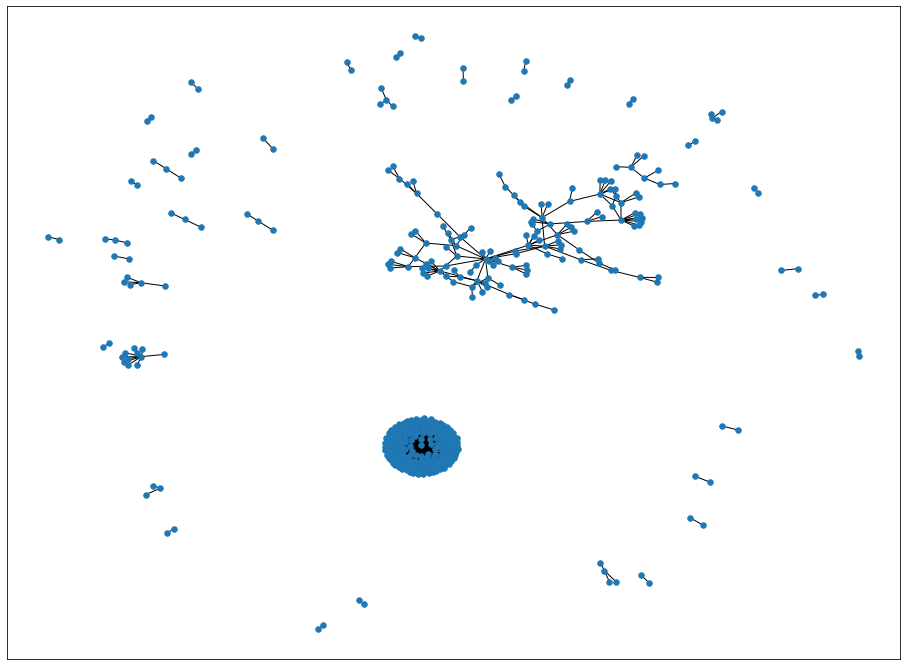

In [6]:
#network_df = pd.read_csv("out/task_2_network.csv", index_col=0)

G = nx.from_pandas_edgelist(df=network_df, 
                            source='username', 
                            target='mention')

draw_network(G)

In [15]:
nework_info(G)

Node with max degree: ('akcjademokracja', 181)
Average degree: 1.8744
Number of connected components: 42
____________________________________________

Communities: 46
Modularity: 0.7226


### Detect communities and visualise them

In [44]:
best_partition_G = get_best_partition(G)
print('Communities:', len(set(best_partition_G.values())))

#best_partition_G

Communities: 46


In [45]:
sorted_best_partition = sorted(best_partition_G.items(), key=lambda kv: kv[1])

sorted_best_partition

[('mihashi_chan', 0),
 ('akcjademokracja', 0),
 ('leodille', 0),
 ('nazwa_mp4', 0),
 ('chipsforthesoul', 0),
 ('dramaclubp', 0),
 ('kosiaralalalala', 0),
 ('belovedjaemin', 0),
 ('bosia_x_bosia', 0),
 ('shezzainacrown', 0),
 ('ozzkar24', 0),
 ('anneimizeb', 0),
 ('acr21x', 0),
 ('karolina80174', 0),
 ('monikasiarnacka', 0),
 ('pinkmoou', 0),
 ('tommogirlzz', 0),
 ('tomczakewa', 0),
 ('marta_sulik', 0),
 ('murrixl0', 0),
 ('elanied11', 0),
 ('xlittledumbass', 0),
 ('naanaja4', 0),
 ('diosatalassa', 0),
 ('_ebangtan', 0),
 ('marta30003582', 0),
 ('chromatydy', 0),
 ('ultrastained', 0),
 ('theresnothinq', 0),
 ('goodiess_s', 0),
 ('adricz94', 0),
 ('wiinterstan', 0),
 ('budzynka', 0),
 ('kasia_narozna', 0),
 ('kajae_p', 0),
 ('lostharry_', 0),
 ('ekmatuszczak', 0),
 ('twmoniek', 0),
 ('_no_one_1111', 0),
 ('qhemmoq', 0),
 ('latidodemimi', 0),
 ('kkwlczk', 0),
 ('goldenbasia', 0),
 ('lucy_alice27', 0),
 ('izabela38007905', 0),
 ('gromperuna', 0),
 ('marzena101618', 0),
 ('margo_1976', 0),


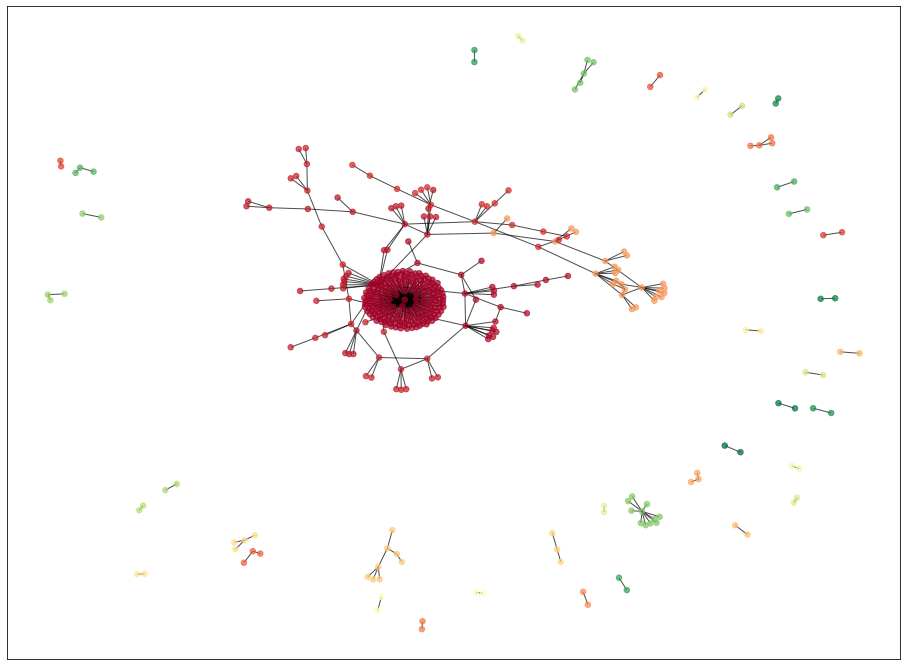

In [46]:
draw_network_partition(G, best_partition_G)

### Get subnet whose components have at least n nodes

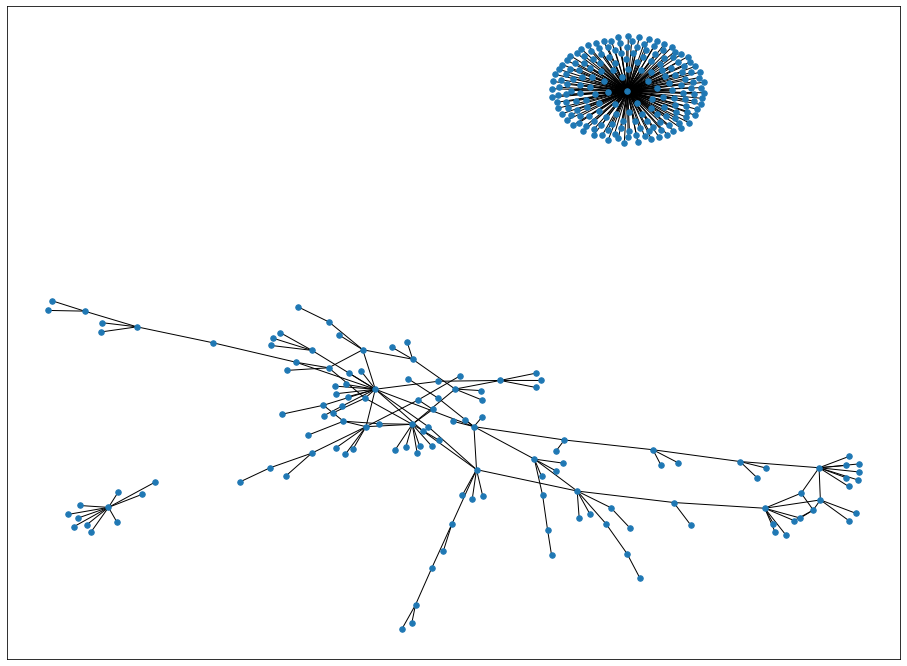

In [47]:
H = G.copy()

for component in list(nx.connected_components(G)):
    if len(component) < 9:
        for node in component:
            H.remove_node(node)

draw_network(H)

In [48]:
nework_info(H)

Node with max degree: ('akcjademokracja', 181)
Average degree: 2.0818
Number of connected components: 3
____________________________________________

Communities: 10
Modularity: 0.6274


In [49]:
best_partition_H = get_best_partition(H)

#best_partition_H

In [50]:
sorted_best_partition = sorted(best_partition_H.items(), key=lambda kv: kv[1])

sorted_best_partition

[('mihashi_chan', 0),
 ('akcjademokracja', 0),
 ('leodille', 0),
 ('nazwa_mp4', 0),
 ('chipsforthesoul', 0),
 ('dramaclubp', 0),
 ('kosiaralalalala', 0),
 ('belovedjaemin', 0),
 ('bosia_x_bosia', 0),
 ('shezzainacrown', 0),
 ('ozzkar24', 0),
 ('anneimizeb', 0),
 ('acr21x', 0),
 ('karolina80174', 0),
 ('monikasiarnacka', 0),
 ('pinkmoou', 0),
 ('tommogirlzz', 0),
 ('tomczakewa', 0),
 ('marta_sulik', 0),
 ('murrixl0', 0),
 ('elanied11', 0),
 ('xlittledumbass', 0),
 ('naanaja4', 0),
 ('diosatalassa', 0),
 ('_ebangtan', 0),
 ('marta30003582', 0),
 ('chromatydy', 0),
 ('ultrastained', 0),
 ('theresnothinq', 0),
 ('goodiess_s', 0),
 ('adricz94', 0),
 ('wiinterstan', 0),
 ('budzynka', 0),
 ('kasia_narozna', 0),
 ('kajae_p', 0),
 ('lostharry_', 0),
 ('ekmatuszczak', 0),
 ('twmoniek', 0),
 ('_no_one_1111', 0),
 ('qhemmoq', 0),
 ('latidodemimi', 0),
 ('kkwlczk', 0),
 ('goldenbasia', 0),
 ('lucy_alice27', 0),
 ('izabela38007905', 0),
 ('gromperuna', 0),
 ('marzena101618', 0),
 ('margo_1976', 0),


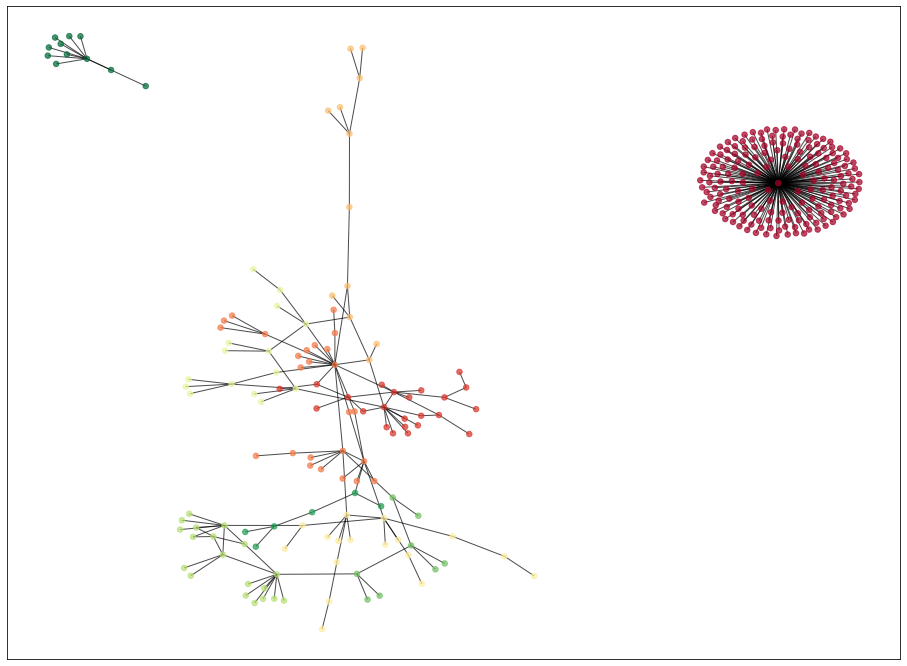

In [51]:
draw_network_partition(H, best_partition_H)

### Select classes for the classifier

In [52]:
sum_global = 0
classes_to_classification = []

for cls in range(10):
    cls_sum = sum(value == cls for value in best_partition_H.values())
    sum_global += cls_sum
    
    if cls_sum > 15:
        classes_to_classification.append(cls)
        
    print(cls, ':', cls_sum)

print('Sum global:', sum_global)

classes_to_classification

0 : 182
1 : 23
2 : 25
3 : 12
4 : 17
5 : 15
6 : 19
7 : 8
8 : 6
9 : 11
Sum global: 318


[0, 1, 2, 4, 6]

In [53]:
graphs = []
for c in nx.connected_components(H):
    graphs.append(G.subgraph(c))
    
for graph in graphs:
    print(graph.number_of_nodes())

182
125
11


### Check which profiles are missing and scrape them

In [69]:
profiles_needed = list(best_partition_H.keys())

len(profiles_needed)
#best_partition_H[profiles_needed[317]]

318

In [55]:
profiles_stored = list(data_df['username'].unique())

len(profiles_stored)

1966

In [56]:
profiles_remaining = []

for profile_needed in profiles_needed:
    if profile_needed not in profiles_stored:
        profiles_remaining.append(profile_needed)
        
len(profiles_remaining)

67

In [57]:
def profile_scraper(username, file_path):
    # Configure
    c = twint.Config()
    
    # Twitter user's username
    c.Username = username
    
    # Search terms
    #c.Search = search_ph
    
    # Filter Tweets sent since date, works only with twint.run.Search (Example: 2017-12-27).
    c.Since = '2019-10-15'
    # Filter Tweets sent until date, works only with twint.run.Search (Example: 2017-12-27).
    #c.Until = '2020-10-25'
    
    # Get retweets done by the user.
    c.Retweets = True
    
    # Set to True to display full user information. By default, only usernames are shown.
    #c.User_full = True
    c.Profile_full = True
    
    # Name of the output file.
    c.Output = file_path
    
    # Set to True to write as a csv file.
    c.Tabs = True
    c.Store_csv = True
    
    # Hide output.
    c.Hide_output = True
    
    # Run
    #twint.run.Search(c)
    twint.run.Profile(c)

In [58]:
#profile_scraper('szumowskilukasz', 'data/users_remaining/szumowskilukasz.csv')

In [59]:
filelist = []
filename_part = 'data/users_remaining/'

for user in profiles_remaining:
    filelist.append(filename_part + user + '.csv')

filelist[:10]

['data/users_remaining/pisorgpl.csv',
 'data/users_remaining/episkopatnews.csv',
 'data/users_remaining/krystpawlowicz.csv',
 'data/users_remaining/andrzejduda.csv',
 'data/users_remaining/strajkkobiet.csv',
 'data/users_remaining/polskapolicja.csv',
 'data/users_remaining/jemilewicz.csv',
 'data/users_remaining/policja_ksp.csv',
 'data/users_remaining/warszawskisk.csv',
 'data/users_remaining/mlodalewica_.csv']

In [31]:
for i in range(len(profiles_remaining)):
    #profile_scraper(profiles_remaining[i], filelist[i])

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 2 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 50 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 22 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 8 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 7 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 3 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 2 deleted tweets in this search.
[!] No more data! Scraping

### Determine the profiles for the classifier

In [82]:
profiles_needed = [key for key in best_partition_H.keys() if best_partition_H[key] in classes_to_classification]

len(profiles_needed)

266

In [84]:
filelist = []
filename_part = 'data/users/'

for user in profiles_needed:
    filelist.append(filename_part + user + '.csv')

filelist[:10]

['data/users/mihashi_chan.csv',
 'data/users/akcjademokracja.csv',
 'data/users/leodille.csv',
 'data/users/grzegorzkrajski.csv',
 'data/users/pisorgpl.csv',
 'data/users/episkopatnews.csv',
 'data/users/nazwa_mp4.csv',
 'data/users/chipsforthesoul.csv',
 'data/users/sen_ggs.csv',
 'data/users/strajkkobiet.csv']

In [159]:
df_list = [pd.read_csv(file, sep='\t', index_col='id') for file in filelist]

df_list[0].columns

Index(['conversation_id', 'created_at', 'date', 'time', 'timezone', 'user_id',
       'username', 'name', 'place', 'tweet', 'language', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'thumbnail',
       'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id',
       'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest'],
      dtype='object')

### Sentiment functions

In [149]:
def get_sentiment(blob):
    text = Text(blob)
    text.language = 'pl'
    
    return text.polarity


def avg_sentiment(tweets):
    if len(tweets) == 0:
        return 0
    
    sum_polarity = sum(get_sentiment(tweet) for tweet in tweets)
        
    return sum_polarity/len(tweets)

### Create data for classification

In [156]:
task_3_df = pd.DataFrame(columns=['username', 'tweets_num', 'avg_tweet_len', 
                                  'avg_sentiment', 'avg_mentions', 'avg_replies', 
                                  'avg_retweets', 'avg_likes', 'avg_hashtags', 
                                  'community'])

for i, df in enumerate(df_list):
    task_3_df = task_3_df.append({'username': profiles_needed[i], 
                                  'tweets_num': len(df),
                                  'avg_tweet_len': df.tweet.str.len().mean(), 
                                  'avg_sentiment': avg_sentiment(df.tweet), 
                                  'avg_mentions': mean([line.count('screen_name') for line in df.mentions]), 
                                  'avg_replies': df.replies_count.mean(), 
                                  'avg_retweets': df.retweets_count.mean(), 
                                  'avg_likes': df.likes_count.mean(), 
                                  'avg_hashtags': mean([line.count('\'')/2 for line in df.hashtags]), 
                                  'community': best_partition_H[profiles_needed[i]]}, ignore_index=True)

In [161]:
task_3_df.head()

,username,tweets_num,avg_tweet_len,avg_sentiment,avg_mentions,avg_replies,avg_retweets,avg_likes,avg_hashtags,community
0,mihashi_chan,665,93.157895,0.121554,0.685714,0.135338,1340.717293,0.344361,1.216541,0
1,akcjademokracja,33,250.515152,0.292929,2.424242,1.636364,20.151515,24.212121,1.636364,0
2,leodille,115,100.330435,0.095652,0.800000,0.069565,2898.547826,0.347826,0.356522,0
3,grzegorzkrajski,1728,85.537037,0.022377,0.433449,0.309028,7.052083,2.820023,0.536458,1
4,pisorgpl,323,159.486068,0.114551,2.034056,20.188854,32.006192,25.130031,1.009288,2


In [160]:
task_3_df.to_csv('out/task_3_dataset.csv')

### Metrics functions

In [247]:
round_precision = 5

def get_accuracy(y_real, y_pred):
    return round(accuracy_score(y_real, y_pred), round_precision)

def get_precision(y_real, y_pred):
    return round(precision_score(y_real, y_pred, average='weighted'), round_precision)

def get_recall(y_real, y_pred):
    return round(recall_score(y_real, y_pred, average='weighted'), round_precision)

def get_FSC(y_real, y_pred):
    return round(f1_score(y_real, y_pred, average='weighted'), round_precision)

def get_all_metrics(y_real, y_pred):
    print("Accuracy:", get_accuracy(y_real, y_pred))
    print("Precision:", get_precision(y_real, y_pred))
    print("Recall:", get_recall(y_real, y_pred))
    print("F1 score:", get_FSC(y_real, y_pred))

### Perform classification and check its results

In [261]:
X = task_3_df[['tweets_num', 'avg_tweet_len', 'avg_sentiment', 
               'avg_mentions', 'avg_replies', 'avg_retweets', 
               'avg_likes', 'avg_hashtags']].copy()

y = task_3_df[['community']].copy()
y = y.astype('int').values.ravel()

In [282]:
clf = DecisionTreeClassifier(random_state=0, max_depth=5)
#clf = RandomForestClassifier(n_estimators=50)
#clf = AdaBoostClassifier(n_estimators=50)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [283]:
get_all_metrics(y_test, y_pred)

Accuracy: 0.68182
Precision: 0.66467
Recall: 0.68182
F1 score: 0.67073


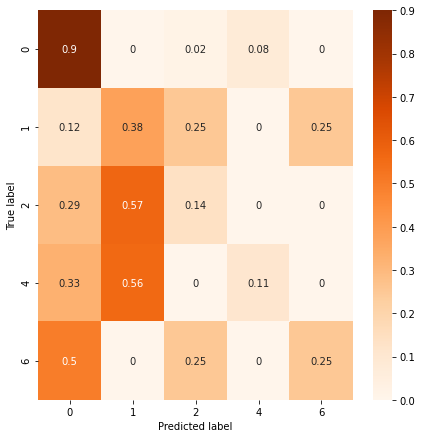

In [285]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_mat_norm = np.around(conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis], decimals=2)

conf_mat_df = pd.DataFrame(conf_mat_norm, 
                           index = classes_to_classification, 
                           columns = classes_to_classification)

figure = plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat_df, annot=True, cmap=plt.cm.Oranges)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

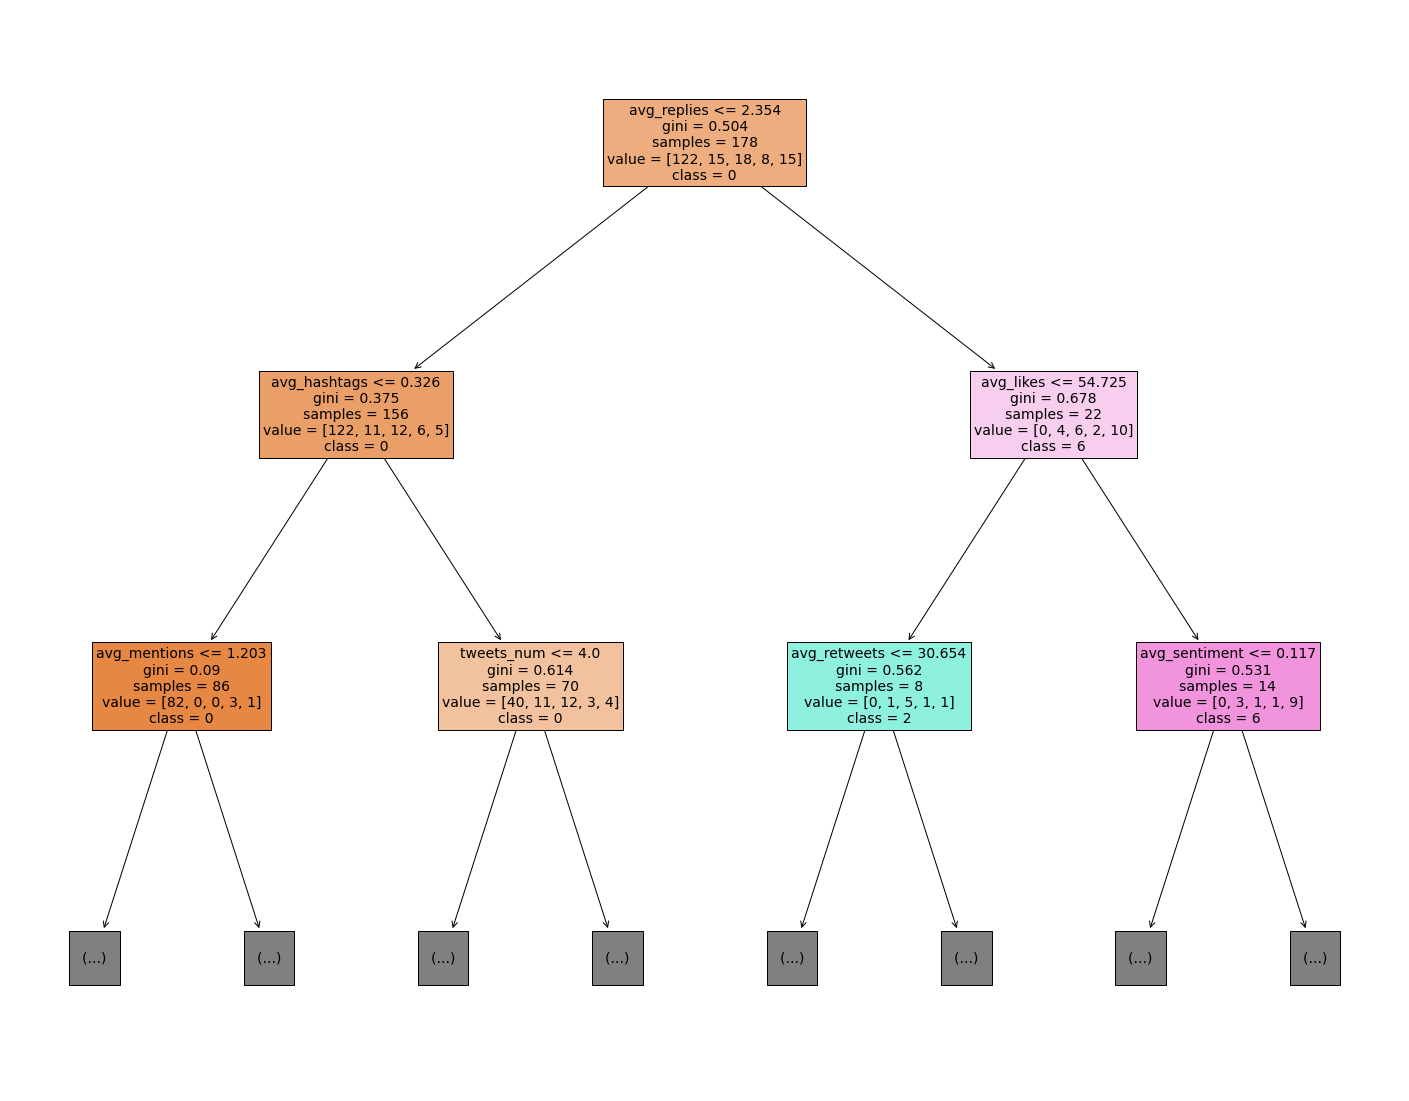

In [286]:
#plot_tree(clf)
fig = plt.figure(figsize=(25,20))
_ = plot_tree(decision_tree=clf, 
              class_names=['0','1','2','4', '6'], 
              feature_names=['tweets_num', 'avg_tweet_len', 'avg_sentiment', 'avg_mentions', 
                             'avg_replies', 'avg_retweets', 'avg_likes', 'avg_hashtags'], 
              filled=True, 
              #proportion=True, 
              fontsize=14, 
              max_depth=2)